In [1]:
import os
import chess
import random
import math
import time
import numpy as np

In [2]:
def evaluateBoard(board, color):
    score = 0
    piece_count = 0
    score_map = {chess.PAWN: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 
                              15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0,
                              11.0, 11.0, 12.0, 13.0, 13.0, 12.0, 11.0, 11.0, 
                              10.5, 10.5, 11.0, 12.5, 12.5, 11.0, 10.5, 10.5,
                              10.0, 10.0, 10.0, 12.0, 12.0, 10.0, 10.0, 10.0,
                              10.5, 9.5, 9.0, 10.0, 10.0, 9.0, 9.5, 10.5, 
                              10.5, 11.0, 11.0, 8.0, 8.0, 11.0, 11.0, 10.5, 
                              10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0],
                 chess.KNIGHT: [25.0, 26.0, 27.0, 27.0, 27.0, 27.0, 26.0, 25.0,
                                26.0, 28.0, 30.0, 30.0, 30.0, 30.0, 28.0, 26.0,
                                27.0, 30.0, 31.0, 31.5, 31.5, 31.0, 30.0, 27.0,
                                27.0, 30.5, 31.5, 32.0, 32.0, 31.5, 30.5, 27.0,
                                27.0, 30.0, 31.5, 32.0, 32.0, 31.5, 30.0, 27.0,
                                27.0, 30.5, 31.0, 31.5, 31.5, 31.0, 30.5, 27.0,
                                26.0, 28.0, 30.0, 30.5, 30.5, 30.0, 28.0, 26.0,
                                25.0, 26.0, 27.0, 27.0, 27.0, 27.0, 26.0, 25.0],
                 chess.BISHOP: [28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0,
                                29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 
                                29.0, 30.0, 30.5, 31.0, 31.0, 30.5, 30.0, 29.0,
                                29.0, 30.5, 30.5, 31.0, 31.0, 30.5, 30.5, 29.0,
                                29.0, 30.0, 31.0, 31.0, 31.0, 31.0, 30.0, 29.0,
                                29.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 29.0,
                                29.0, 30.5, 30.0, 30.0, 30.0, 30.0, 30.5, 29.0,
                                28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0],
                 chess.ROOK:  [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0,
                               50.5, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.5,
                               49.5, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.5,
                               49.5, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.5,
                               49.5, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.5,
                               49.5, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.5,
                               49.5, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.5,
                               49.0, 49.0, 49.0, 50.5, 50.5, 50.0, 49.0, 49.0],
                 chess.QUEEN: [88.0, 89.0, 89.0, 89.5, 89.5, 89.0, 89.0, 88.0,
                               89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 89.0,
                               89.0, 90.0, 90.5, 90.5, 90.5, 90.5, 90.0, 89.0,
                               89.5, 90.0, 90.5, 90.5, 90.5, 90.5, 90.0, 89.5,
                               90.0, 90.0, 90.5, 90.5, 90.5, 90.5, 90.0, 89.5,
                               89.0, 90.5, 90.5, 90.5, 90.5, 90.5, 90.0, 89.0,
                               89.0, 90.0, 90.5, 90.0, 90.0, 90.0, 90.0, 89.0,
                               88.0, 89.0, 89.0, 89.5, 89.5, 89.0, 89.0, 88.0],
                 chess.KING:  [897.0, 896.0, 896.0, 895.0, 895.0, 896.0, 896.0, 897.0,
                               897.0, 896.0, 896.0, 895.0, 895.0, 896.0, 896.0, 897.0,
                               897.0, 896.0, 896.0, 895.0, 895.0, 896.0, 896.0, 897.0,
                               897.0, 896.0, 896.0, 895.0, 895.0, 896.0, 896.0, 897.0,
                               898.0, 897.0, 897.0, 896.0, 896.0, 897.0, 897.0, 898.0,
                               899.0, 898.0, 898.0, 898.0, 898.0, 898.0, 898.0, 899.0,
                               902.0, 902.0, 900.0, 900.0, 900.0, 900.0, 902.0, 902.0,
                               902.0, 903.0, 901.0, 900.0, 900.0, 901.0, 903.0, 902.0]}
    for piecetype in [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]:
        for pc_color in [chess.WHITE, chess.BLACK]:
            pcs = list(board.pieces(piecetype, pc_color))
            if pc_color == chess.WHITE:
                pc_map = list(reversed(score_map[piecetype]))
            else:
                pc_map = list(score_map[piecetype])
            for pc in pcs:
                if pc_color == color:
                    score += pc_map[pc]
                else:
                    score -= pc_map[pc]
        
    if board.turn == color:
        if board.is_checkmate():
            score -= 9999
        if board.is_check():
            score -= 10
    if board.turn != color:
        if board.is_stalemate():
            score -= 1000
        if board.can_claim_threefold_repetition():
            score -= 1000
    return score

def minimaxRoot(depth, board, color):
    """
    Returns the best minimax _move_ for a given board and player
    """
    bestMove = ""
    bestMoveScore = -9000
    
    for move in board.legal_moves:
        board.push_uci(move.uci())
        value = minimax(depth-1, board, -10000, 10000, color)
        board.pop()
        #if color == chess.BLACK:
        #    value *= -1
        if value > bestMoveScore:
            bestMoveScore = value
            bestMove = move
        
    return bestMove.uci()


def minimax(depth, board, alpha, beta, color):
    """
    Returns the minimax _value_ for a given board and player
    """
    if depth == 0:
        return evaluateBoard(board, color)
    
    if color == chess.WHITE:
        bestMoveScore = -9000
        for move in board.legal_moves:
            board.push_uci(move.uci())
            bestMoveScore = np.max([bestMoveScore, 
                                    minimax(depth - 1, board, 
                                            alpha, beta, 
                                            chess.BLACK)])
            board.pop()
            alpha = np.max([alpha, bestMoveScore])
            if beta <= alpha:
                return bestMoveScore
        
        return bestMoveScore
    elif color == chess.BLACK:
        bestMoveScore = 9000
        for move in board.legal_moves:
            board.push_uci(move.uci())
            bestMoveScore = np.min([bestMoveScore, 
                                    minimax(depth - 1, board, 
                                            alpha, beta,
                                            chess.WHITE)])
            board.pop()
            beta = np.min([beta, bestMoveScore])
            if beta <= alpha:
                return bestMoveScore
        
    return bestMoveScore

In [3]:
# Initialise board
board = chess.Board()

# Starting depth of search -- increases as number of possible moves decreases
INIT_DEPTH_WHITE = 3
INIT_DEPTH_BLACK = 4
STARTING_MOVES = len(list(board.legal_moves))

while not board.is_game_over():
    # Pick a move at random
    if board.turn == chess.WHITE:
        # white's move
        random_move = random.choice([move for move in board.legal_moves])
        move = random_move.uci()
    else:
        # black's turn
        DEPTH_BLACK =  np.min([math.floor((STARTING_MOVES * INIT_DEPTH_BLACK / (len(list(board.legal_moves)) / 2))),
                               INIT_DEPTH_BLACK])
        move = minimaxRoot(DEPTH_BLACK, board, chess.BLACK)
        print(DEPTH_BLACK)
    board.push_uci(move)

4
4
4
4
3
3
4
3
4
3
4
4
4
3
3
3
3
3
4
4
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [3]:
def play_against_human(humanColor=chess.WHITE, aiDepth=4):
    board = chess.Board()
    
    if humanColor != chess.WHITE:
        start = time.clock()
        bestAIMove = minimaxRoot(aiDepth, board, not humanColor)
        print ("time to move: ", time.clock() - start)
        print("chesstron 3000 move:", bestAIMove)
        board.push_uci(bestAIMove)
        display(board)
        
    while not board.is_game_over():
        player_move = input("Enter human player's move: ")
        while True:
            try:
                board.push_uci(player_move)
            except:
                player_move = input("Bad input. Enter human player's move ")
            else:
                break
        
        start = time.clock()
        bestAIMove = minimaxRoot(aiDepth, board, not humanColor)
        print ("time to move: ", time.clock() - start)
        print("chesstron 3000 move:", bestAIMove)
        board.push_uci(bestAIMove)
        display(board)



Enter human player's move: e2e4
time to move:  2.017292999999995
chesstron 3000 move: g8f6


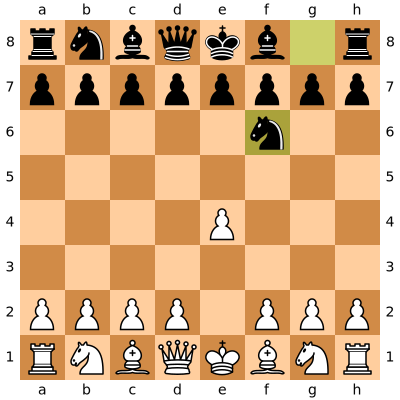

Enter human player's move: e4e5
time to move:  2.7676680000000005
chesstron 3000 move: f6e4


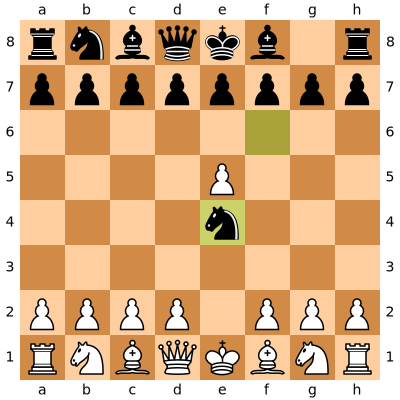

Enter human player's move: d2d3
time to move:  5.734849000000011
chesstron 3000 move: e4c5


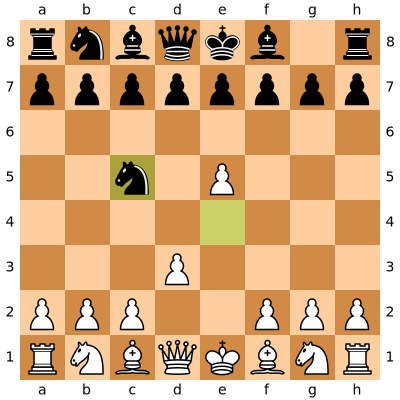

Enter human player's move: d3d4
time to move:  4.702791000000005
chesstron 3000 move: c5e6


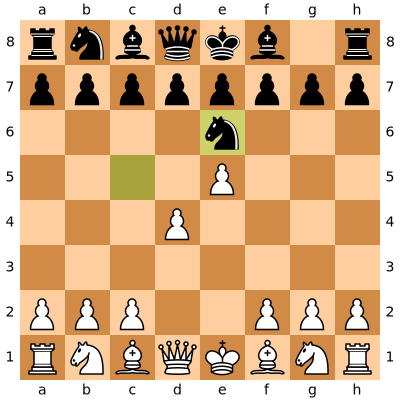

Enter human player's move: d4d5
time to move:  3.8781990000000093
chesstron 3000 move: e6c5


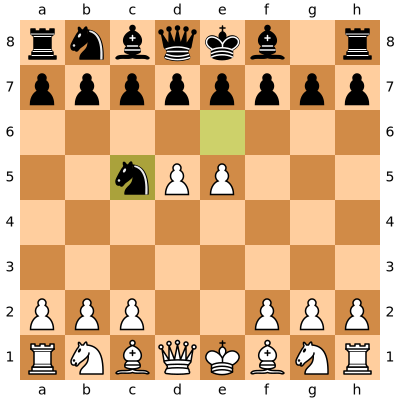

Enter human player's move: c1e3
time to move:  4.187889999999996
chesstron 3000 move: c5e4


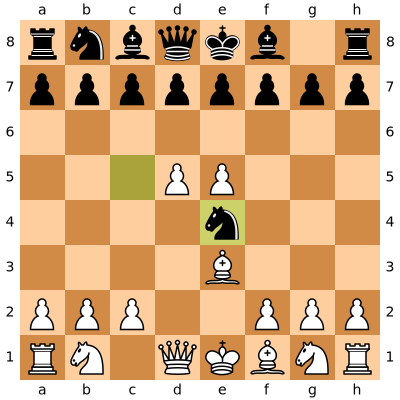

Enter human player's move: f1d3
time to move:  6.749937000000003
chesstron 3000 move: f7f5


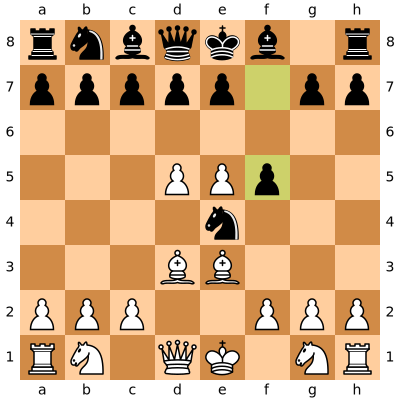

Enter human player's move: f2f3
time to move:  7.485229000000004
chesstron 3000 move: f5f4


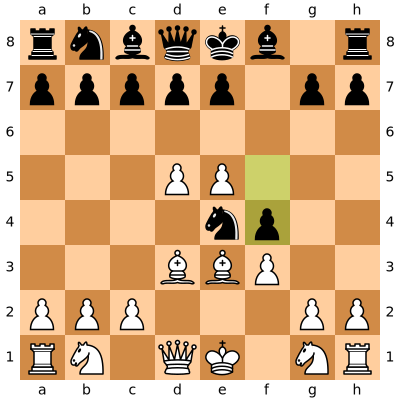

Enter human player's move: e3f4
time to move:  5.249409999999983
chesstron 3000 move: e4c5


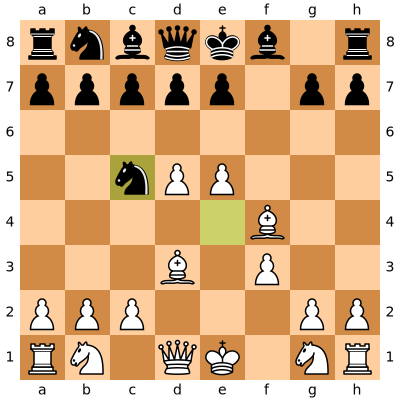

Enter human player's move: b1c3
time to move:  7.949711999999977
chesstron 3000 move: g7g5


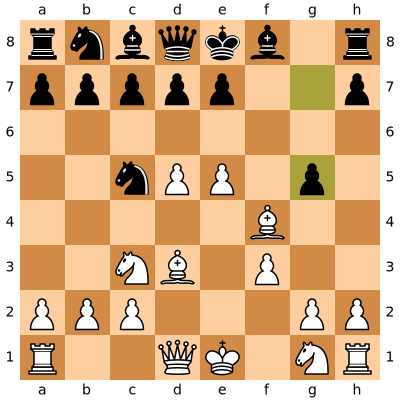

Enter human player's move: f4g5
time to move:  8.783692000000002
chesstron 3000 move: h8g8


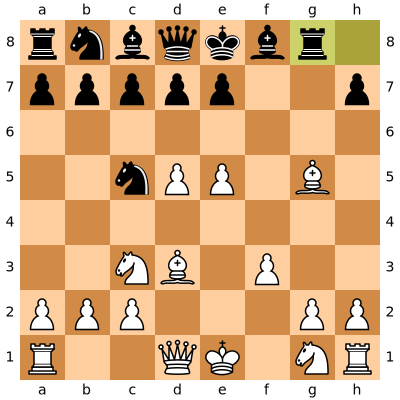

Enter human player's move: f3f4
time to move:  6.683947999999987
chesstron 3000 move: c5d3


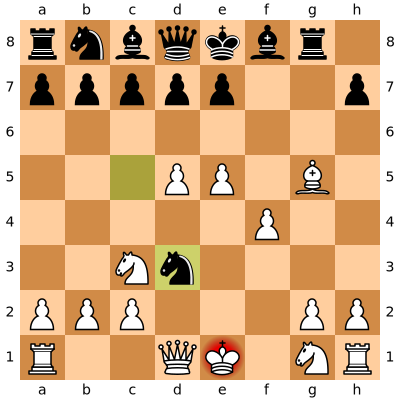

Enter human player's move: c2d3
time to move:  4.758532000000002
chesstron 3000 move: g8g6


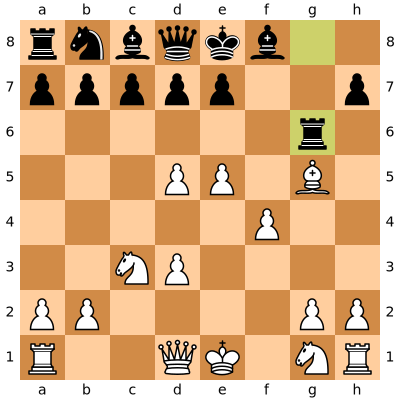

Enter human player's move: d1h5
time to move:  4.622473999999983
chesstron 3000 move: f8g7


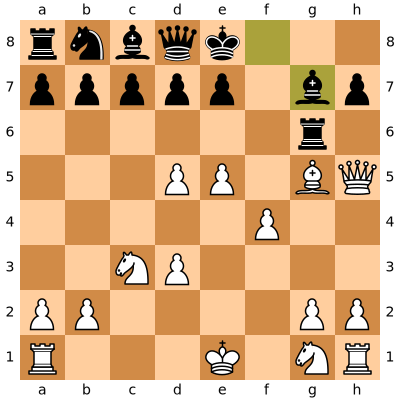

Enter human player's move: h5h7
time to move:  2.797112999999996
chesstron 3000 move: e8f7


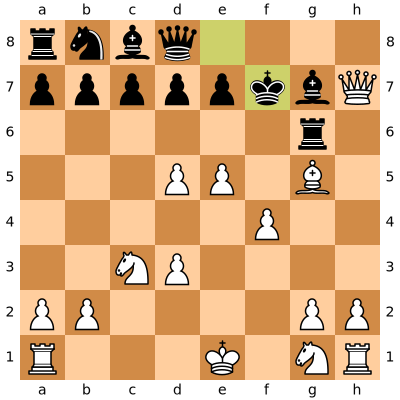

Enter human player's move: g1f3
time to move:  13.422322000000008
chesstron 3000 move: d7d6


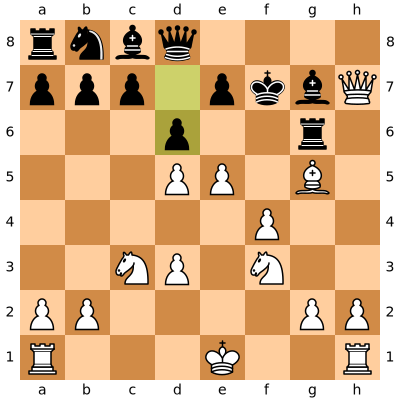

Enter human player's move: e5e6
time to move:  1.0577150000000017
chesstron 3000 move: c8e6


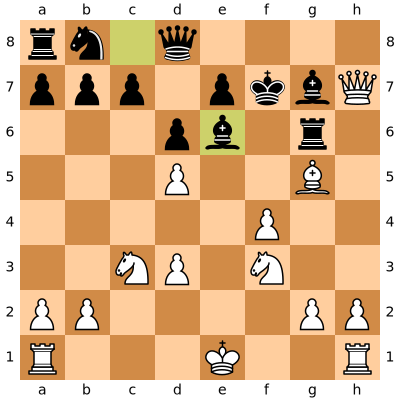

Enter human player's move: d5e6
time to move:  0.4547849999999869
chesstron 3000 move: g6e6


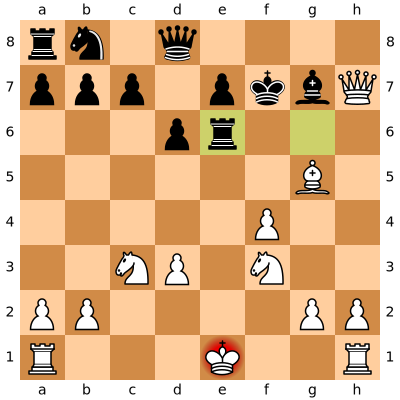

Enter human player's move: e1d2
time to move:  10.323570000000018
chesstron 3000 move: e6g6


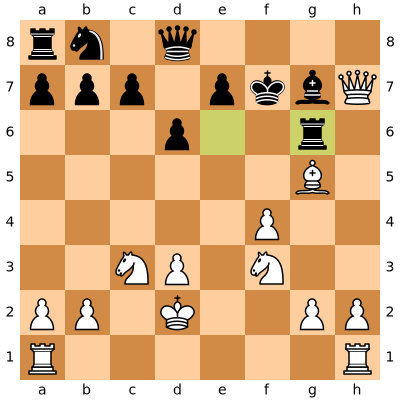

Enter human player's move: f4f5
time to move:  4.0029969999999935
chesstron 3000 move: g6g5


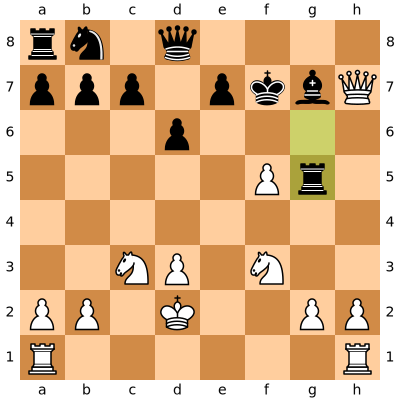

Enter human player's move: f3g5
time to move:  0.37620599999999627
chesstron 3000 move: f7f8


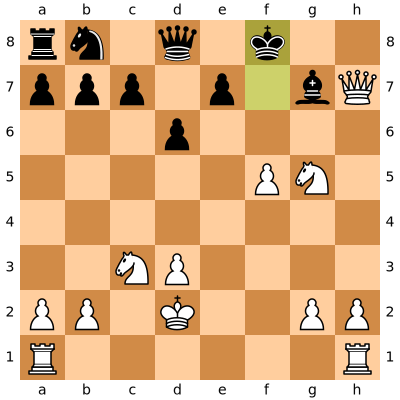

Enter human player's move: g5e6
time to move:  0.2359090000000208
chesstron 3000 move: f8e8


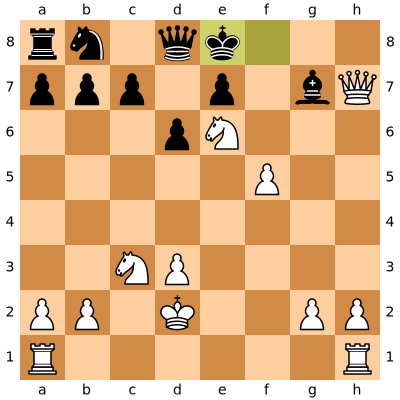

Enter human player's move: e6d8
time to move:  3.0799729999999954
chesstron 3000 move: g7c3


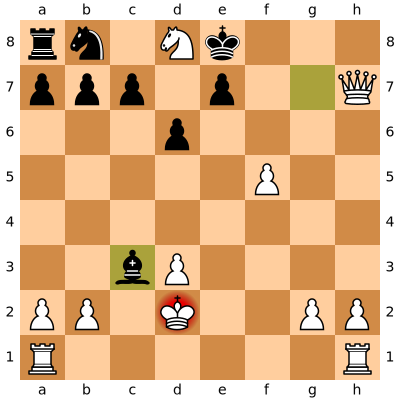

Enter human player's move: b2c3
time to move:  1.3488089999999886
chesstron 3000 move: e8d8


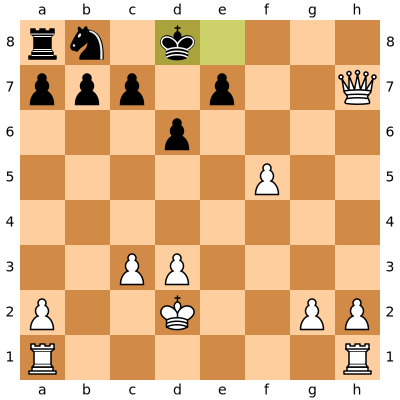

Enter human player's move: h1e1
time to move:  0.9471510000000194
chesstron 3000 move: b8c6


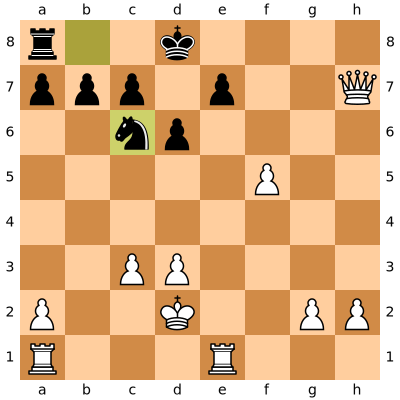

Enter human player's move: h7h8
time to move:  0.08547799999999484
chesstron 3000 move: d8d7


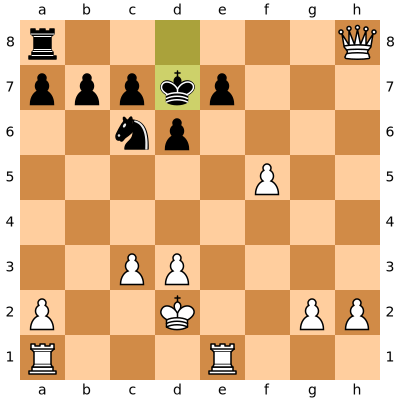

Enter human player's move: h8a8
time to move:  1.7933800000000133
chesstron 3000 move: b7b5


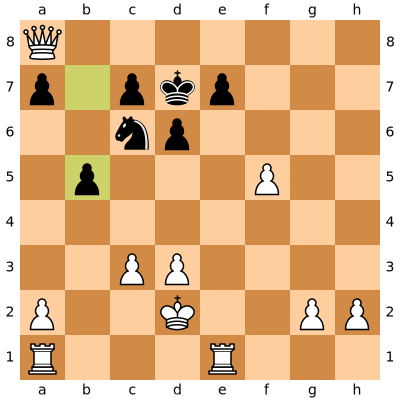

Enter human player's move: a2a4
time to move:  2.7876939999999877
chesstron 3000 move: b5a4


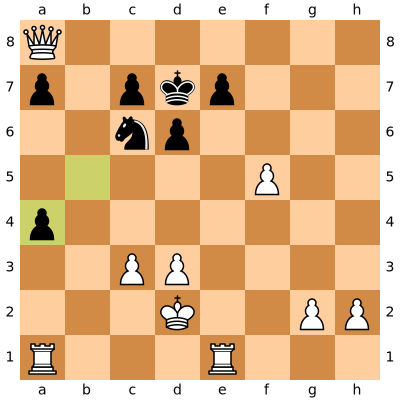

Enter human player's move: a1a4
time to move:  2.3146930000000054
chesstron 3000 move: d6d5


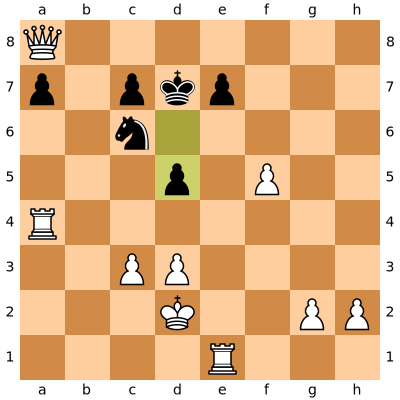

Enter human player's move: a8g8
time to move:  2.0232039999999927
chesstron 3000 move: d5d4


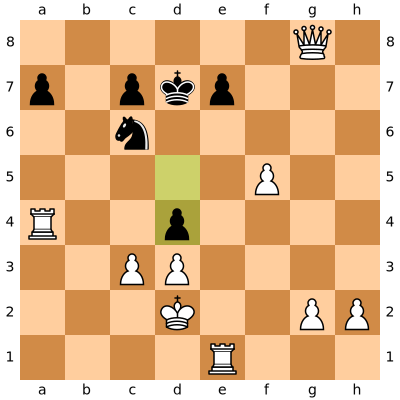

Enter human player's move: g8e6
time to move:  0.19365300000001184
chesstron 3000 move: d7d8


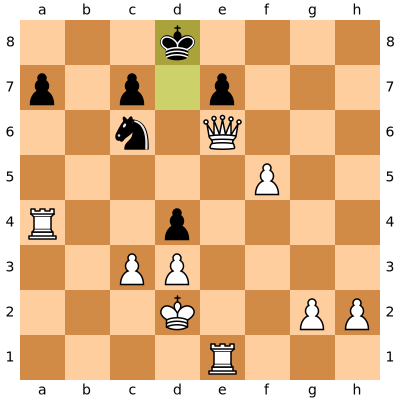

Enter human player's move: e6c6
time to move:  0.5314789999999903
chesstron 3000 move: d4c3


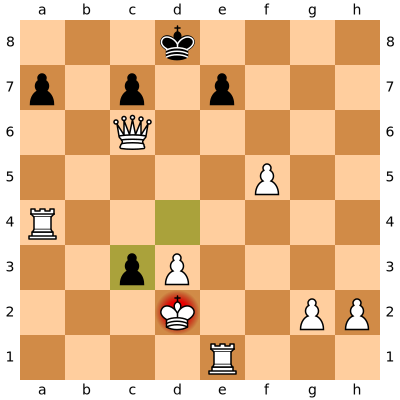

Enter human player's move: d2c3
time to move:  0.5649310000000014
chesstron 3000 move: d8c8


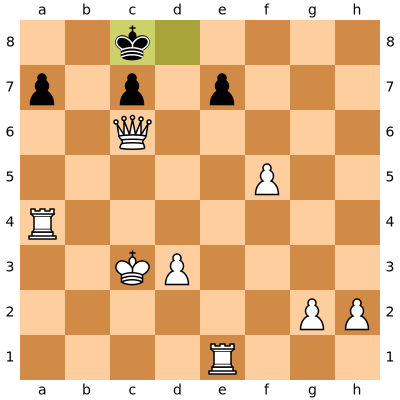

Enter human player's move: e1e7


AttributeError: 'str' object has no attribute 'uci'

In [7]:
play_against_human(humanColor=chess.WHITE, aiDepth=3)